In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [ ]:
df_all = pd.read_csv('pr13_all_cols.csv')
#to visualize dependecies between features and grasp their behavior we make the assumption that ~10k rows = 10% of the dataset is enough
df = df_all.sample(frac=0.1, random_state=42)
print(df.shape)
print(df.info())

(4946, 116)
<class 'pandas.core.frame.DataFrame'>
Index: 4946 entries, 75607 to 25763
Columns: 116 entries, Dividends to Stock Splits_signal
dtypes: float64(106), int64(7), object(3)
memory usage: 4.4+ MB
None


1
1
1


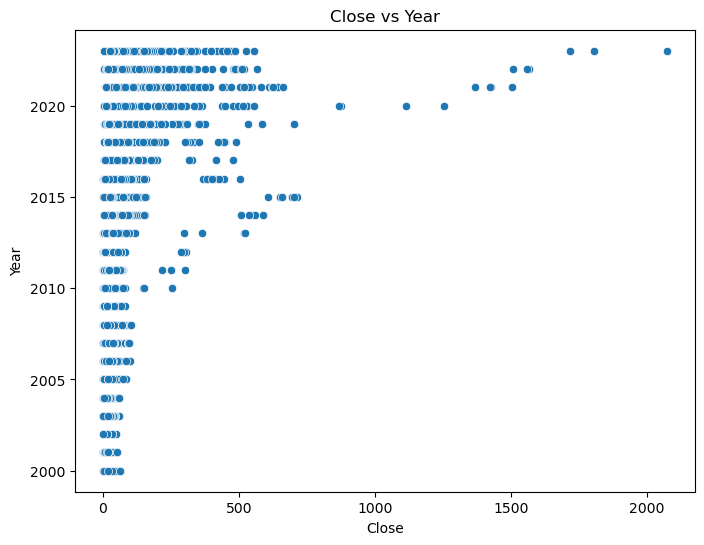

In [55]:
num_ticks = 5


plt.figure(figsize=(8, 6))
print('1')
sns.scatterplot(data=df, x="Close", y="Year", legend=False)
print('1')

# xmin, xmax = plt.xlim()
# tick_positions = np.linspace(xmin, xmax, num_ticks)
# tick_labels = [f"{pos:.2f}" for pos in tick_positions]
print('1')

plt.title('Close vs Year')
# plt.xticks(tick_positions, tick_labels)
plt.show()

# plt.figure(figsize=(8, 6))
# sns.stripplot(data=df, x="Close", y="Month", hue="Ticker", legend=False)
# plt.title('Close vs Month')
# plt.show()

# plt.figure(figsize=(8, 6))
# sns.stripplot(data=df, x="Close", y="Day", hue="Ticker", legend=False)
# plt.title('Close vs Day')
# plt.show()

# plt.figure(figsize=(8, 6))
# sns.stripplot(data=df, x="Close", y="DayOfWeek", hue="Ticker", legend=False)
# plt.title('Close vs DayOfWeek')
# plt.show()

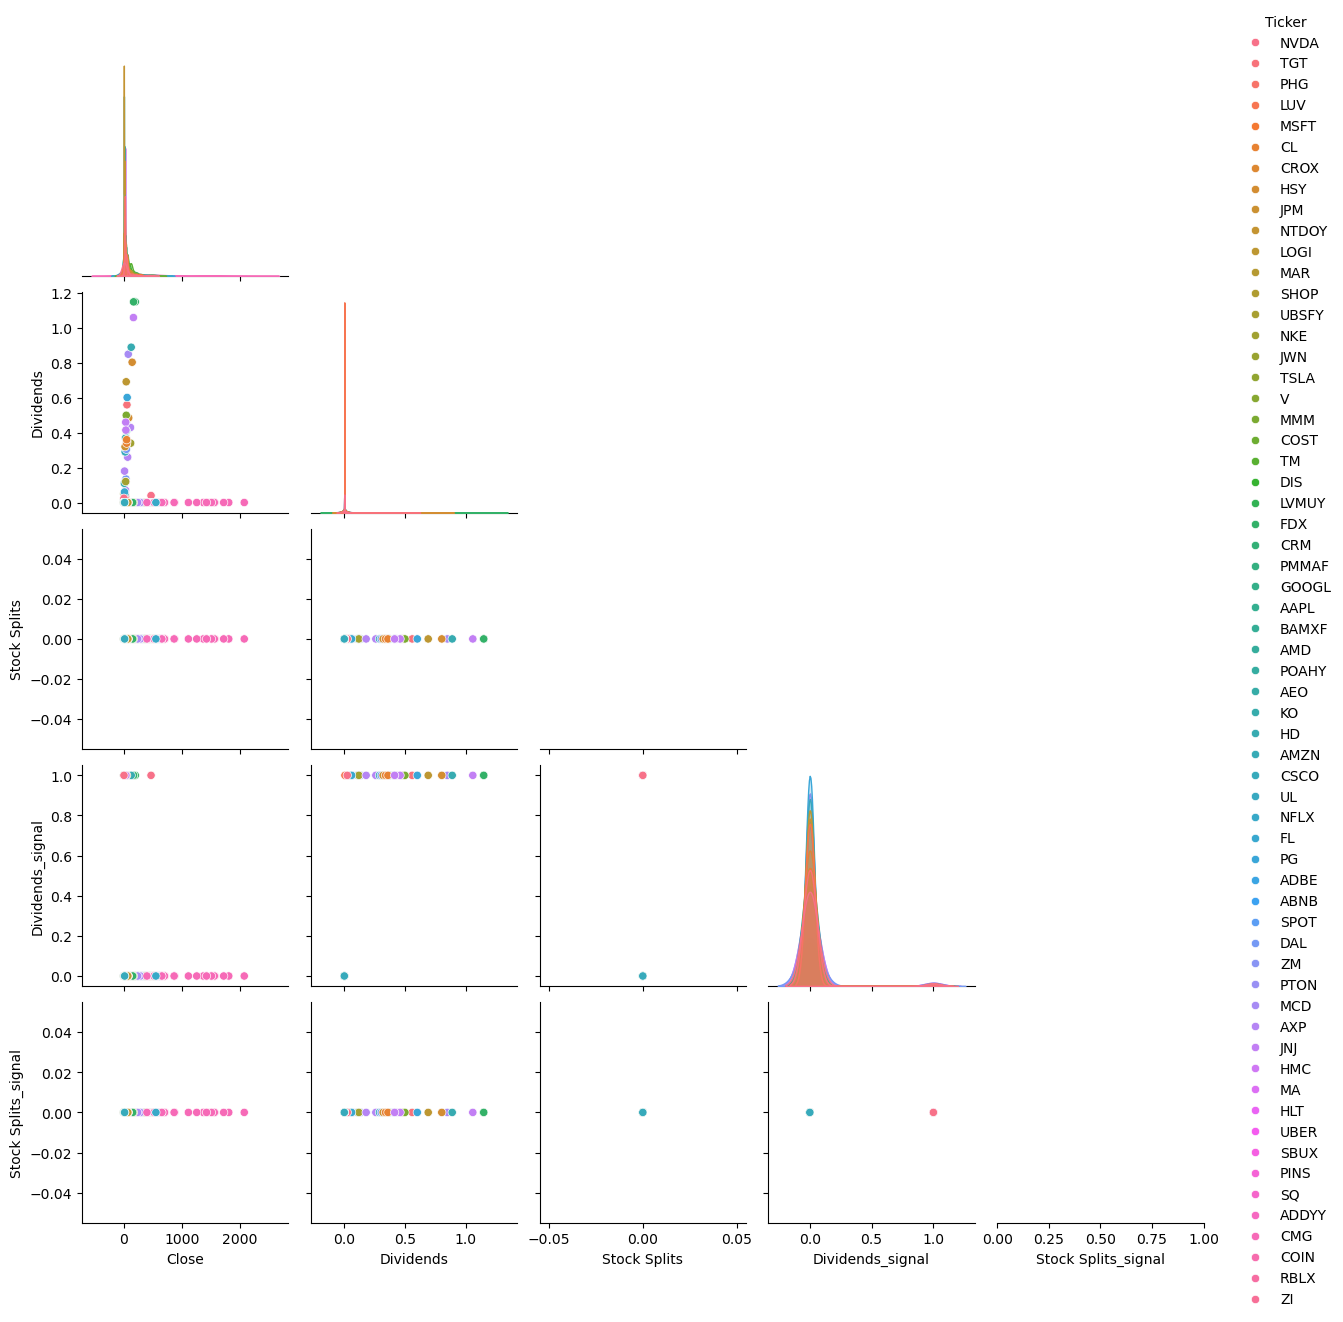

In [56]:
# 'pairplot of close, div, stock split, theri signal'
g= sns.pairplot(df[['Close', 'Dividends', 'Stock Splits', 'Dividends_signal', 'Stock Splits_signal','Ticker']], hue = 'Ticker', diag_kind="kde", corner=True)
# g._legend.remove()
plt.show()


C:\Users\timmv\AppData\Local\Temp\ipykernel_1116\3692800710.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Country', y='Close', data=df, jitter=True, palette='deep')


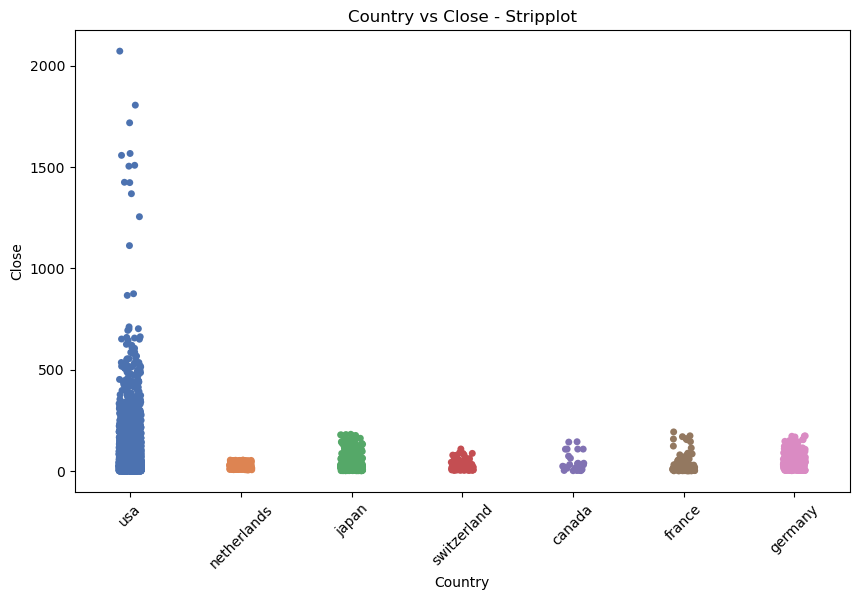

C:\Users\timmv\AppData\Local\Temp\ipykernel_1116\3692800710.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Industry_Tag', y='Close', data=df, jitter=True, palette='muted')


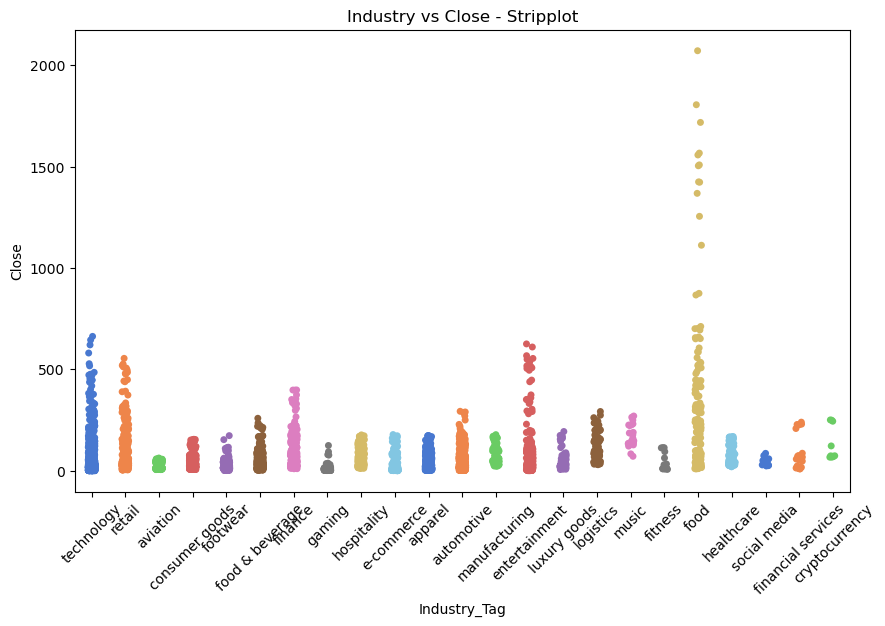

C:\Users\timmv\AppData\Local\Temp\ipykernel_1116\3692800710.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Ticker', y='Close', data=df, jitter=True, palette='bright')


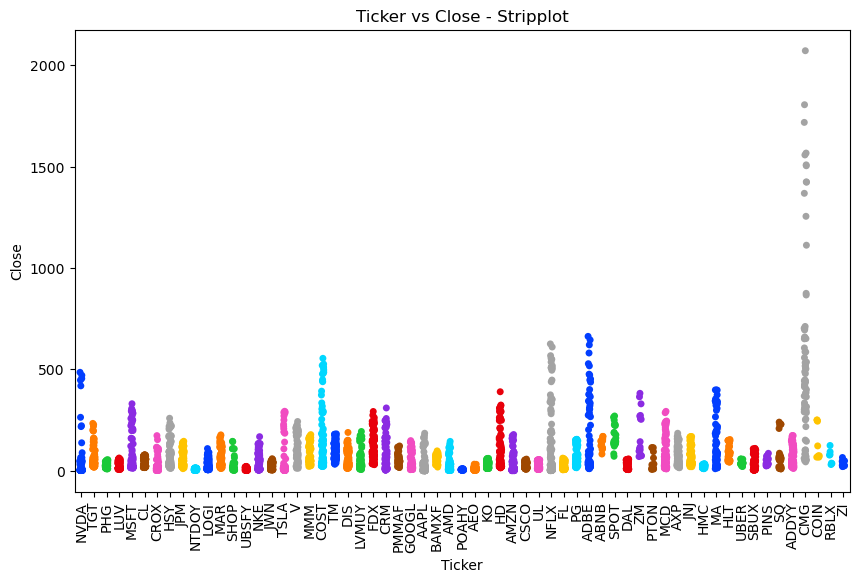

In [57]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='Country', y='Close', data=df, jitter=True, palette='deep')
plt.title('Country vs Close - Stripplot')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.stripplot(x='Industry_Tag', y='Close', data=df, jitter=True, palette='muted')
plt.title('Industry vs Close - Stripplot')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.stripplot(x='Ticker', y='Close', data=df, jitter=True, palette='bright')
plt.title('Ticker vs Close - Stripplot')
plt.xticks(rotation=90)
plt.show()


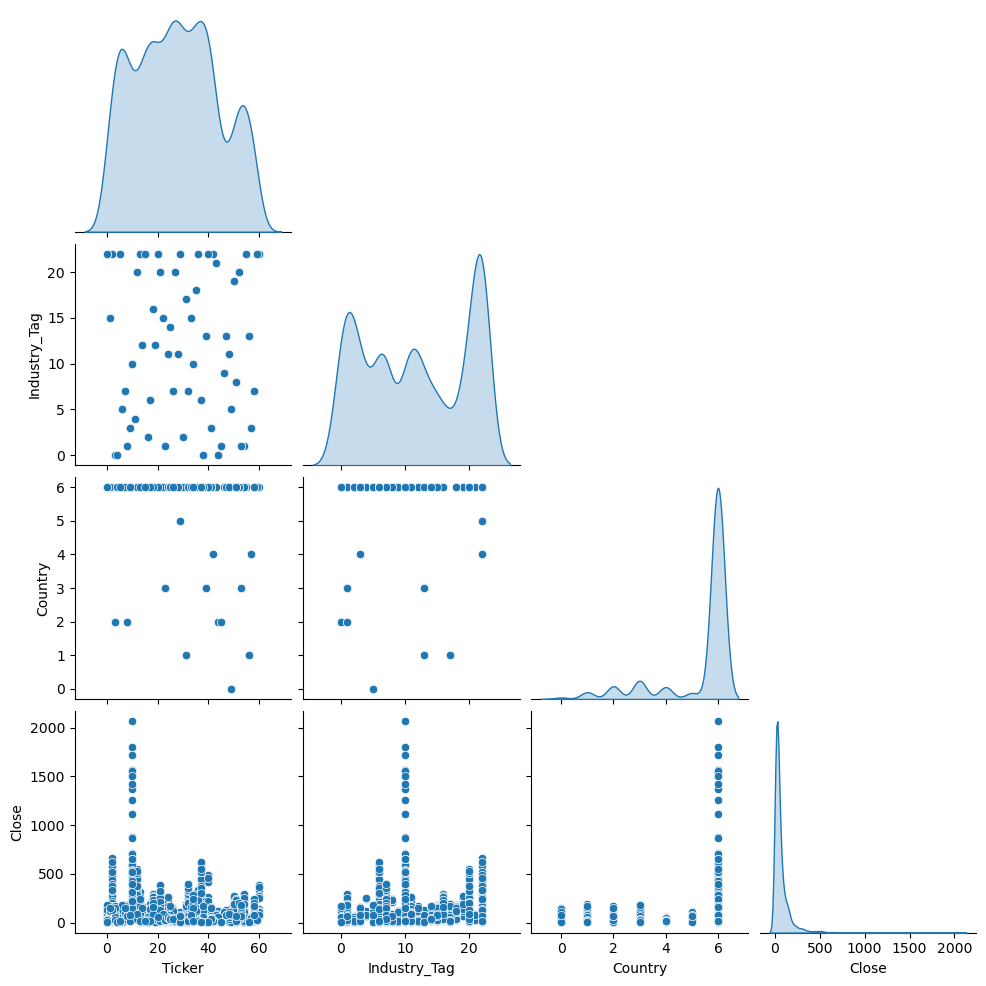

In [58]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Assuming 'df' is your original DataFrame

# Instantiate the OrdinalEncoder
encoder = OrdinalEncoder()

# Encode the categorical columns
encoded_features = encoder.fit_transform(df[['Ticker', 'Industry_Tag', 'Country']])

# Create a new DataFrame with the encoded features and the 'Close' column
encoded_df = pd.DataFrame(encoded_features, columns=['Ticker', 'Industry_Tag', 'Country'])

# Add the 'Close' column to the new DataFrame
encoded_df['Close'] = df['Close'].values

sns.pairplot(encoded_df, diag_kind="kde", corner=True)

In [59]:
pd.set_option('display.max_rows', None)
df.isna().sum()

Dividends                    0
Stock Splits                 0
Ticker                       0
Industry_Tag                 0
Country                      0
Close                        0
Year                         0
Month                        0
Day                          0
DayOfWeek                    0
Day_Number                   0
Close_Lag_1                  1
Volume_Lag_1                 1
Days_Since_Lag_1             1
Close_Lag_2                  3
Volume_Lag_2                 3
Days_Since_Lag_2             3
Close_Lag_3                  6
Volume_Lag_3                 6
Days_Since_Lag_3             6
Close_Lag_4                  8
Volume_Lag_4                 8
Days_Since_Lag_4             8
Close_Lag_5                 11
Volume_Lag_5                11
Days_Since_Lag_5            11
Close_Lag_10                26
Volume_Lag_10               26
Days_Since_Lag_10           26
Close_Lag_20                56
Volume_Lag_20               56
Days_Since_Lag_20           56
Close_La

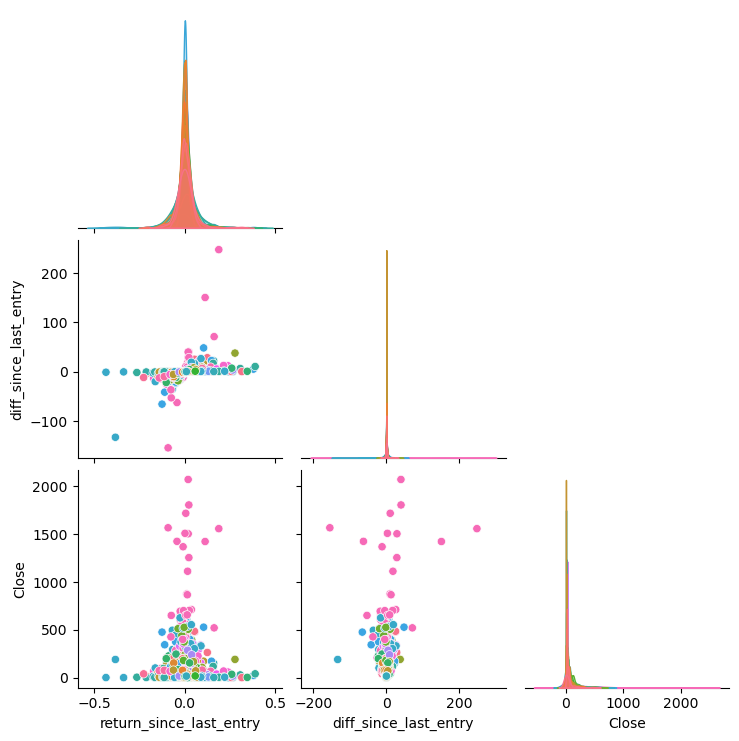

In [60]:
g = sns.pairplot(df[['return_since_last_entry','diff_since_last_entry','Close', 'Ticker']], hue = "Ticker", diag_kind="kde", corner=True)
g._legend.remove()
plt.show()


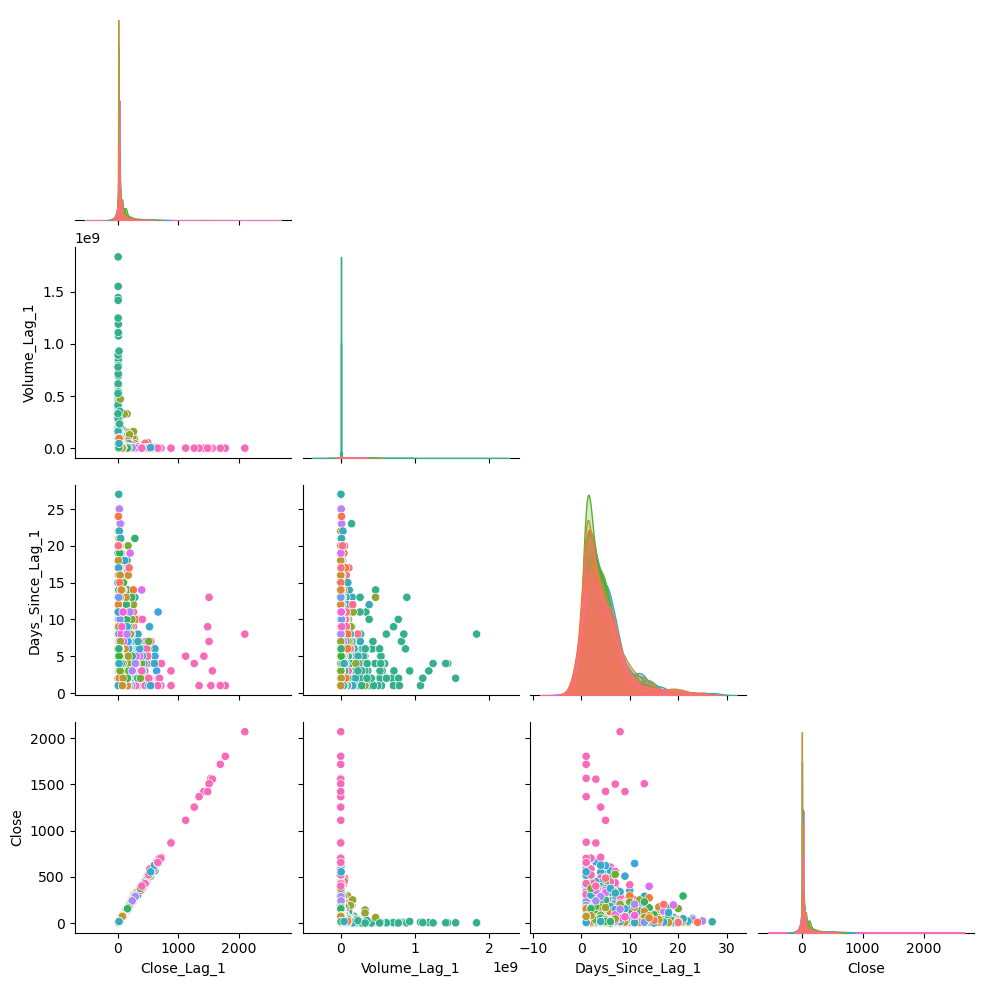

In [61]:
g = sns.pairplot(df[['Close_Lag_1','Volume_Lag_1','Days_Since_Lag_1','Close', 'Ticker']], hue = "Ticker", diag_kind="kde", corner=True)
g._legend.remove()
plt.show()


Status: 2


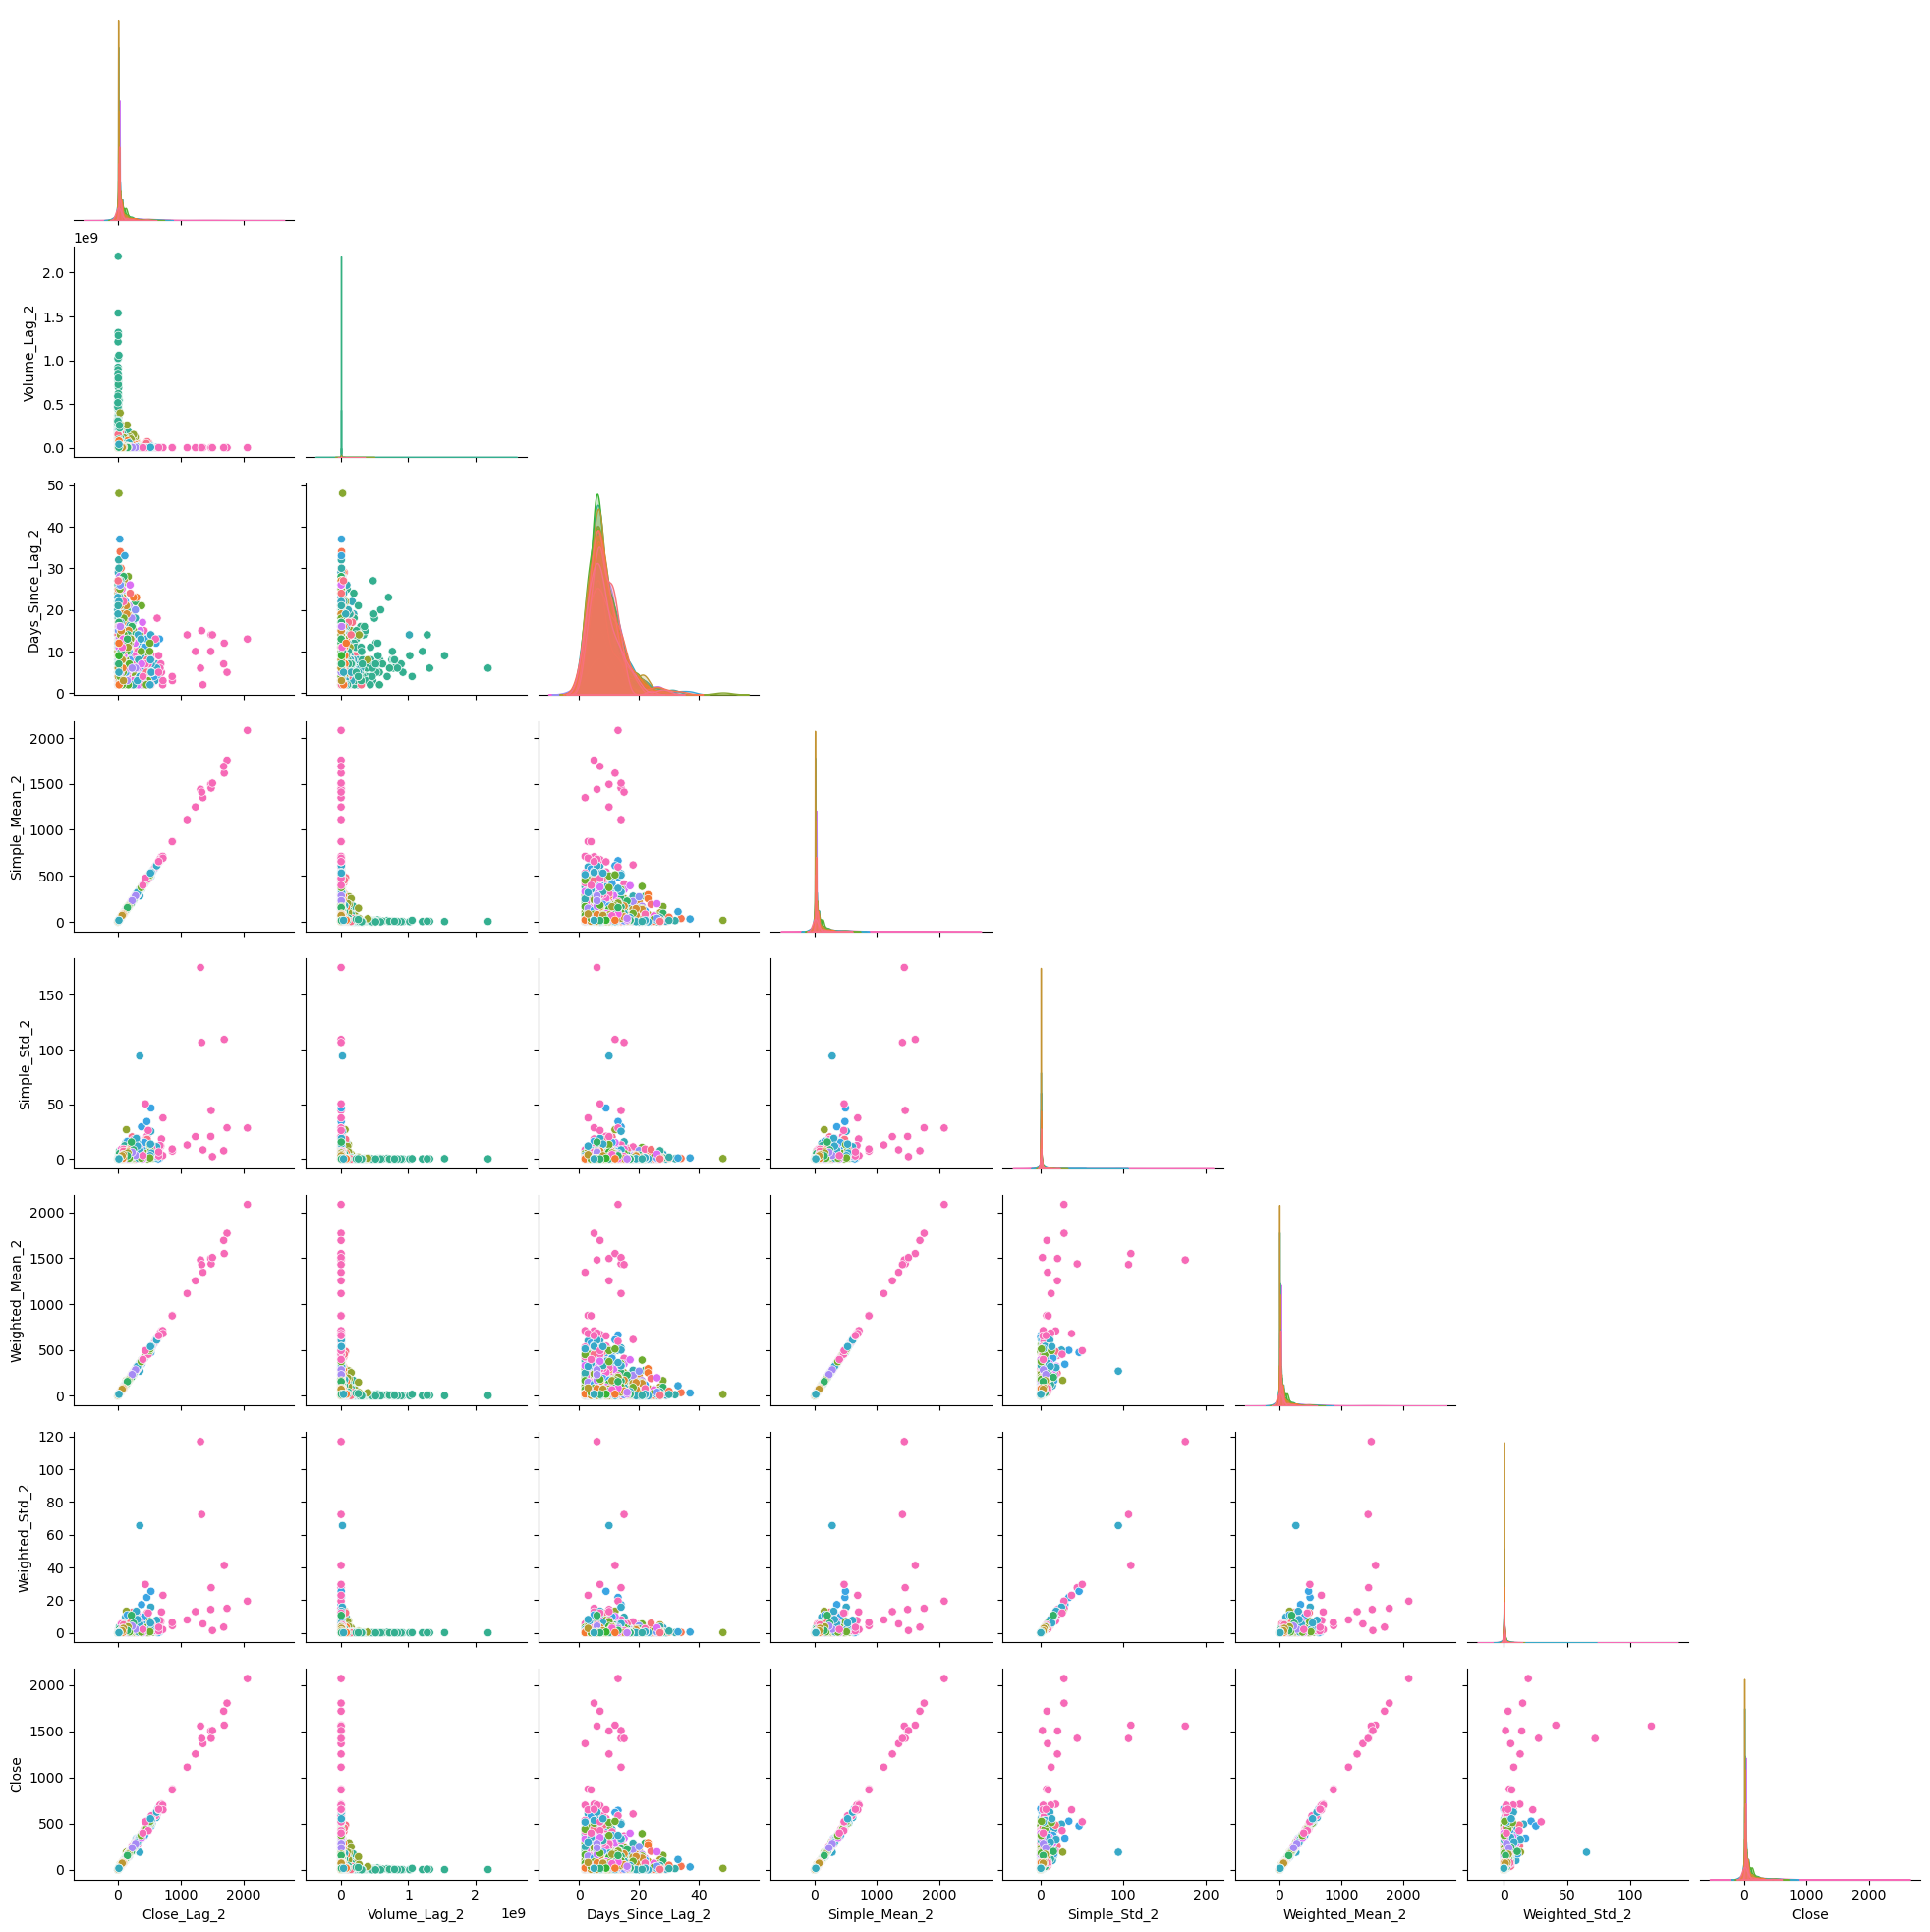

In [62]:
lookback_list = [2]#,3,4,5,10,20,30,40,50,60,70,80,90,100]
for lookback in lookback_list:
    print('Status:', lookback)
    feature_list =  f'Simple_Mean_{lookback}'
    g = sns.pairplot(df[[f'Close_Lag_{lookback}',f'Volume_Lag_{lookback}',f'Days_Since_Lag_{lookback}',f'Simple_Mean_{lookback}',f'Simple_Std_{lookback}',f'Weighted_Mean_{lookback}',f'Weighted_Std_{lookback}','Close', 'Ticker']], hue = "Ticker", diag_kind="kde", corner=True)
    g._legend.remove()
    plt.show()

In [63]:
# Step 1: Drop columns that have "Simple" in their name
df = df.drop(columns=[col for col in df.columns if 'Simple' in col])

# Step 2: Find all "Days_Since" columns
days_cols = [col for col in df.columns if 'Days_Since' in col]

# Keep the first, drop the others
df = df.drop(columns=days_cols[1:])

# Step 3: Find all "Volume_Lag" columns
volume_cols = [col for col in df.columns if 'Volume_Lag' in col]

# Keep the first, drop the others
df = df.drop(columns=volume_cols[1:])

In [64]:
pd.set_option('display.max_rows', None)
df.isna().sum()

Dividends                    0
Stock Splits                 0
Ticker                       0
Industry_Tag                 0
Country                      0
Close                        0
Year                         0
Month                        0
Day                          0
DayOfWeek                    0
Day_Number                   0
Close_Lag_1                  1
Volume_Lag_1                 1
Days_Since_Lag_1             1
Close_Lag_2                  3
Close_Lag_3                  6
Close_Lag_4                  8
Close_Lag_5                 11
Close_Lag_10                26
Close_Lag_20                56
Close_Lag_30                84
Close_Lag_40               109
Close_Lag_50               132
Close_Lag_60               160
Close_Lag_70               186
Close_Lag_80               217
Close_Lag_90               253
Close_Lag_100              288
Weighted_Mean_2              3
Weighted_Std_2               3
Weighted_Mean_3              6
Weighted_Std_3               6
Weighted

In [65]:
column_types = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes.values
})
print(column_types)

numerical_cols = df.select_dtypes(include='float64').columns.tolist() 
numerical_cols.append('Day_Number')

all_columns = df.columns.tolist()

categorical_cols = list(set(all_columns) - set(numerical_cols))

print(categorical_cols)
print(numerical_cols)


                Column Name Data Type
0                 Dividends   float64
1              Stock Splits   float64
2                    Ticker    object
3              Industry_Tag    object
4                   Country    object
5                     Close   float64
6                      Year     int64
7                     Month     int64
8                       Day     int64
9                 DayOfWeek     int64
10               Day_Number     int64
11              Close_Lag_1   float64
12             Volume_Lag_1   float64
13         Days_Since_Lag_1   float64
14              Close_Lag_2   float64
15              Close_Lag_3   float64
16              Close_Lag_4   float64
17              Close_Lag_5   float64
18             Close_Lag_10   float64
19             Close_Lag_20   float64
20             Close_Lag_30   float64
21             Close_Lag_40   float64
22             Close_Lag_50   float64
23             Close_Lag_60   float64
24             Close_Lag_70   float64
25          

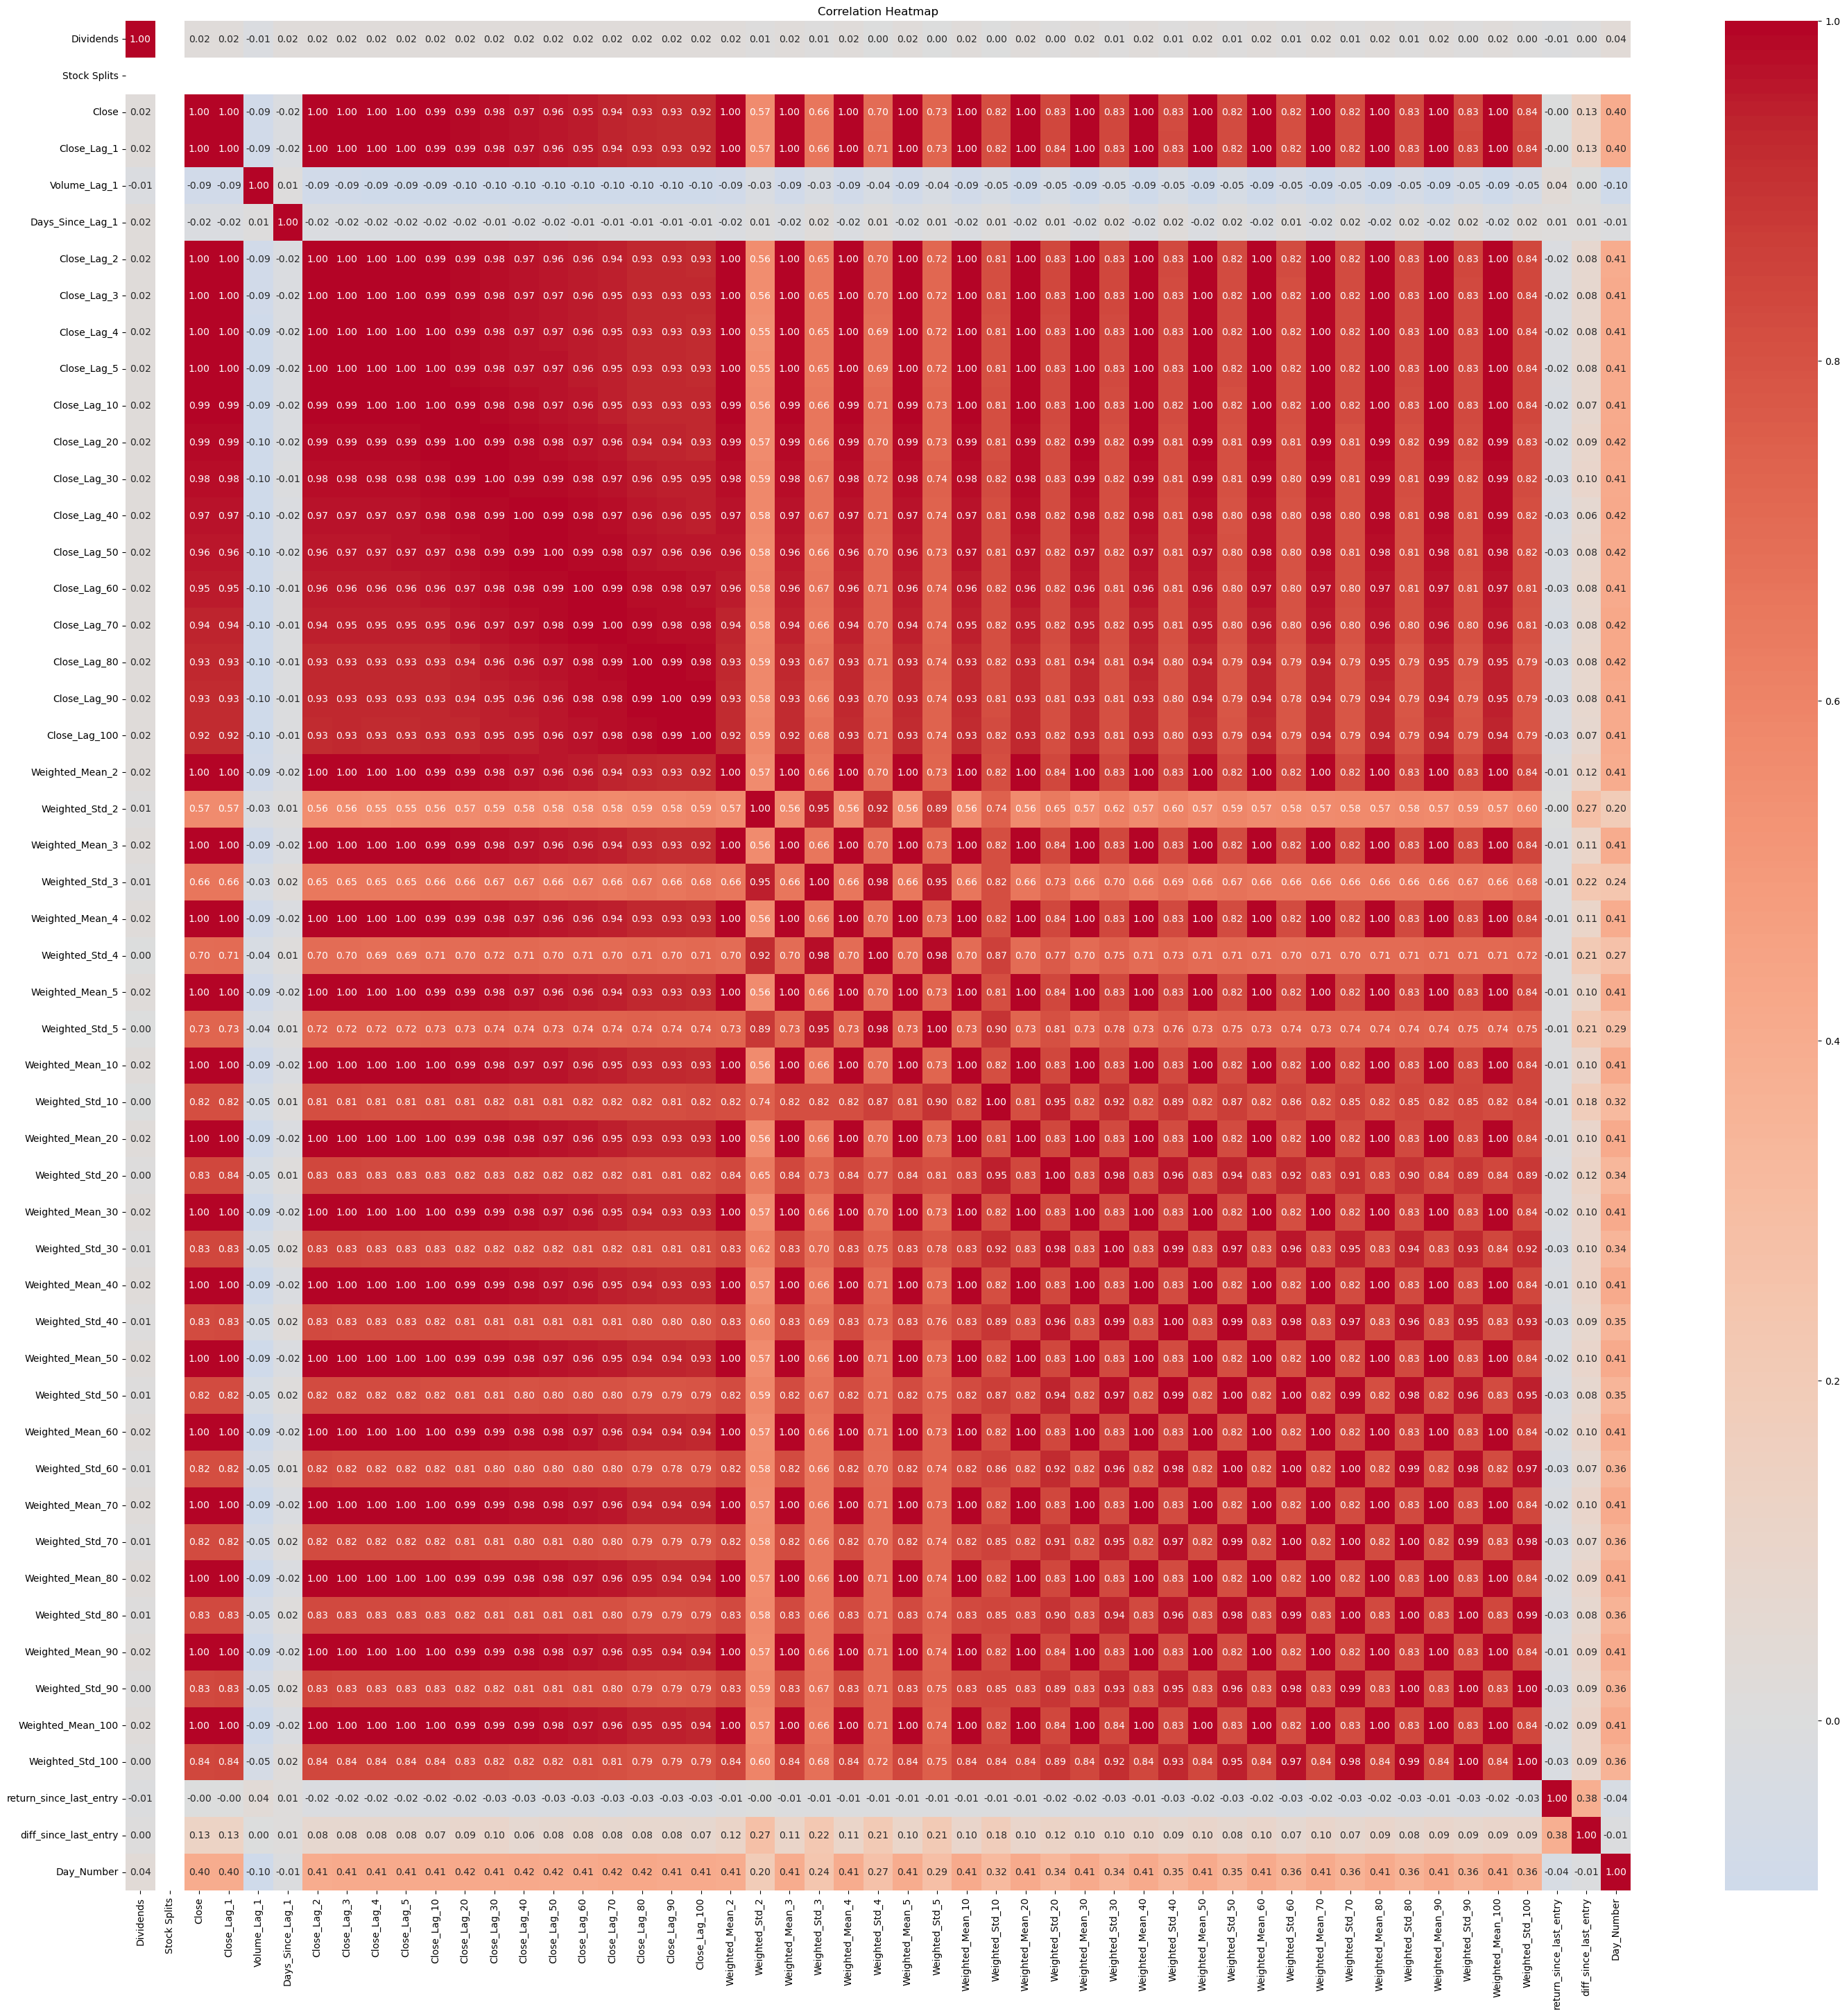

Close_Lag_1                0.999470
Weighted_Mean_2            0.999381
Weighted_Mean_3            0.999266
Weighted_Mean_4            0.999172
Weighted_Mean_5            0.999094
Weighted_Mean_10           0.998787
Weighted_Mean_20           0.998286
Close_Lag_2                0.998088
Weighted_Mean_30           0.997862
Close_Lag_3                0.997490
Weighted_Mean_40           0.997466
Weighted_Mean_50           0.997086
Close_Lag_4                0.996959
Weighted_Mean_60           0.996755
Weighted_Mean_70           0.996461
Close_Lag_5                0.996320
Weighted_Mean_80           0.996145
Weighted_Mean_90           0.995855
Weighted_Mean_100          0.995631
Close_Lag_10               0.991892
Close_Lag_20               0.985573
Close_Lag_30               0.978263
Close_Lag_40               0.968902
Close_Lag_50               0.962758
Close_Lag_60               0.953672
Close_Lag_70               0.942765
Close_Lag_80               0.927656
Close_Lag_90               0

Text(0.5, 1.0, "Correlation with 'Close'")

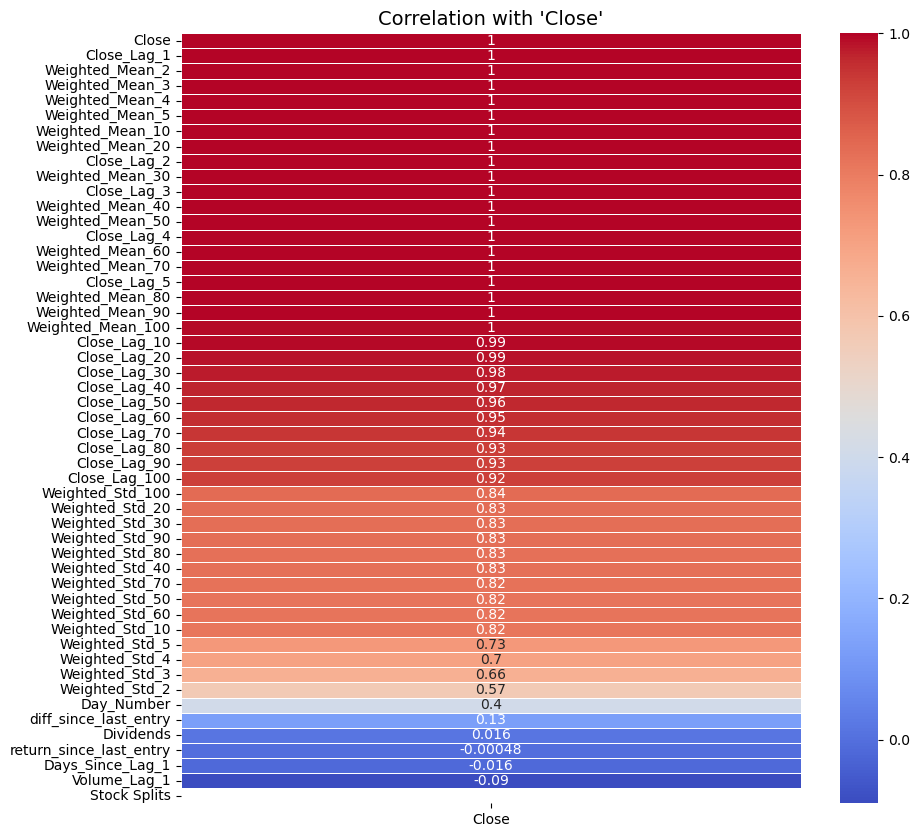

In [66]:

df_numeric = df[numerical_cols]
plt.figure(figsize=(35, 35))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

corr_matrix = df_numeric.corr()
target_corr = corr_matrix['Close'].drop('Close').sort_values(ascending=False)
print(target_corr)

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix[['Close']].sort_values(by='Close', ascending=False), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(f"Correlation with '{'Close'}'", fontsize=14)

                         Mutual Information
Feature                                    
Close_Lag_1                        3.724760
Weighted_Mean_2                    3.683460
Weighted_Mean_3                    3.640250
Weighted_Mean_4                    3.593393
Weighted_Mean_5                    3.559090
Weighted_Mean_10                   3.429330
Close_Lag_2                        3.344110
Weighted_Mean_20                   3.241547
Close_Lag_3                        3.119684
Weighted_Mean_30                   3.114193
Weighted_Mean_40                   3.011117
Close_Lag_4                        2.963467
Weighted_Mean_50                   2.945630
Weighted_Mean_60                   2.887581
Close_Lag_5                        2.869064
Weighted_Mean_70                   2.838985
Weighted_Mean_80                   2.795091
Weighted_Mean_90                   2.753865
Weighted_Mean_100                  2.720405
Close_Lag_10                       2.491194
Close_Lag_20                    

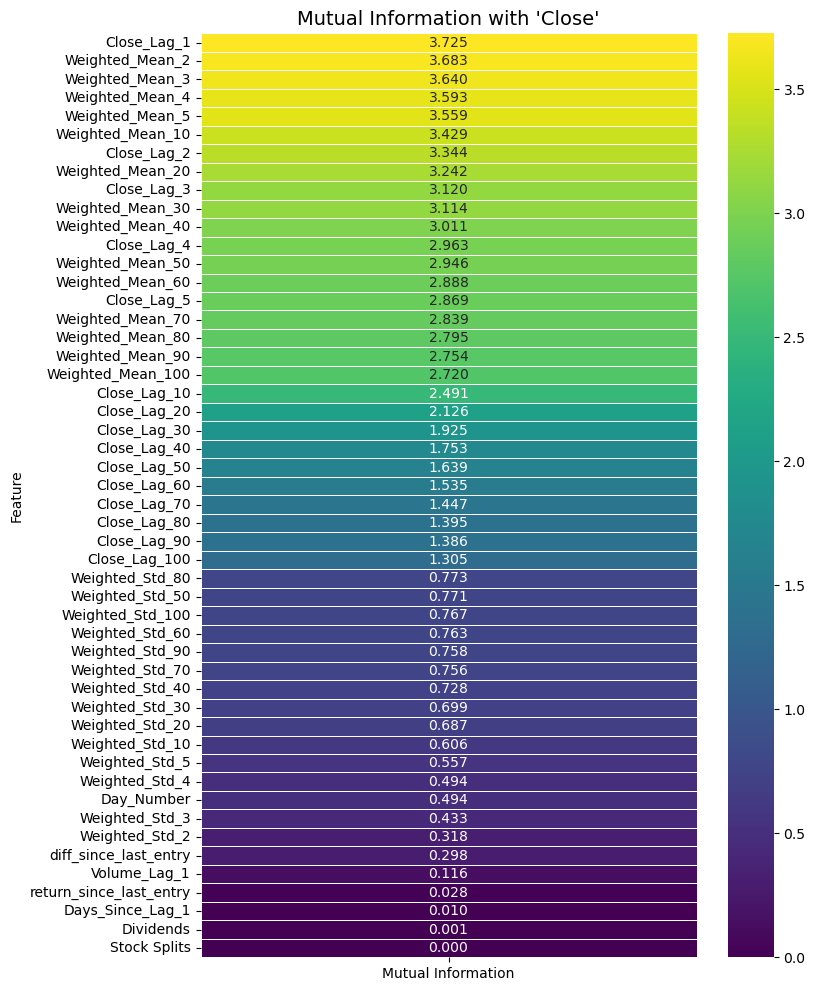

In [67]:
from sklearn.feature_selection import mutual_info_regression

df_numeric = df[numerical_cols]
df_numeric = df_numeric.dropna()

# Compute mutual information matrix
X = df_numeric.drop(columns=['Close'])  # Features
y = df_numeric['Close']                 # Target

# Compute mutual information for each feature w.r.t 'Close'
mi_scores = mutual_info_regression(X, y, random_state=0)

# Put results into a DataFrame
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi_scores})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False).set_index('Feature')


print(mi_df)

plt.figure(figsize=(8, 12))
sns.heatmap(mi_df[['Mutual Information']], annot=True, fmt=".3f", cmap='viridis', linewidths=0.5)
plt.title(f"Mutual Information with '{'Close'}'", fontsize=14)
plt.show()

In [68]:
n=30
def analyze_correlation(df, n_features=n):
    # Keep numeric columns + Ticker separatelydf.select_dtypes(include=[np.number]).columns.tolist()
    numeric_cols = numerical_cols
    if 'Close' not in numeric_cols:
        raise ValueError("'Close' must be in your DataFrame and numeric.")

    if 'Ticker' not in df.columns:
        raise ValueError("'Ticker' must be in your DataFrame.")

    results = []

    # Step 1: Calculate correlations
    for ticker, group in df.groupby('Ticker'):
        if len(group) < 2:
            continue  # skip tickers with not enough data

        group_numeric = group[numeric_cols]  # <-- only numeric columns here!

        corr_matrix = group_numeric.corr()
        target_corr = corr_matrix['Close'].drop('Close').sort_values(ascending=False)

        top_features = target_corr.head(n_features)

        for rank, (feature_name, correlation) in enumerate(top_features.items(), start=1):
            results.append({
                'Ticker': ticker,
                'Feature': feature_name,
                'Correlation': correlation,
                'Rank': rank
            })

    # Step 2: Create a nice DataFrame from results
    results_df = pd.DataFrame(results)

    return results_df


results_df = analyze_correlation(df) 

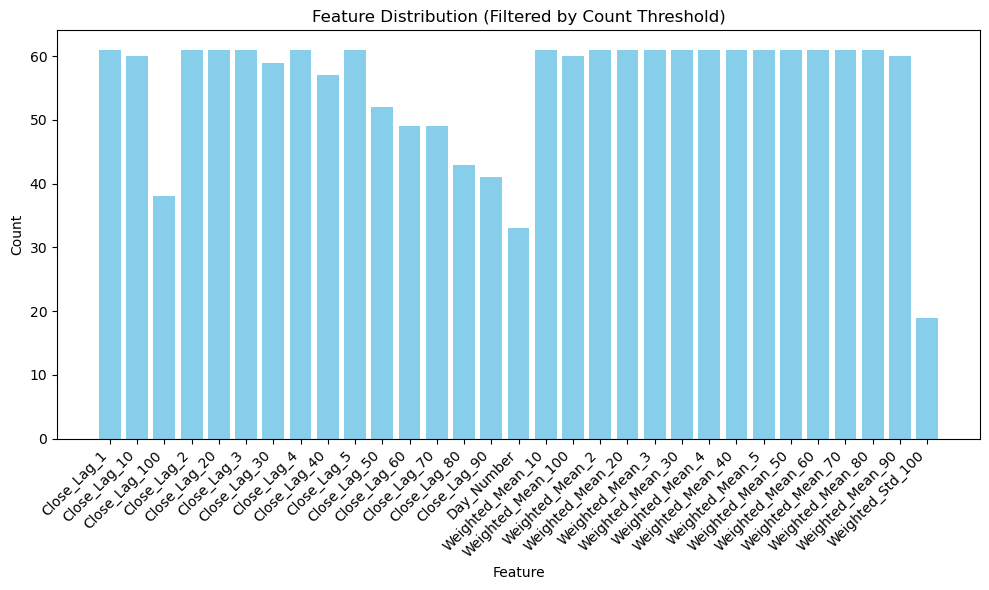

In [69]:
unique_features, counts = np.unique(results_df['Feature'], return_counts=True)

# Combine the unique features and their counts into a DataFrame
feature_distribution = pd.DataFrame({'Feature': unique_features, 'Count': counts})

threshold = n/2  # Change this to whatever threshold you want

# Filter features that meet the threshold condition
filtered_distribution = feature_distribution[feature_distribution['Count'] > threshold]

# Plot the distribution using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(filtered_distribution['Feature'], filtered_distribution['Count'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.title('Feature Distribution (Filtered by Count Threshold)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [74]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

def analyze_mutual_information(df, n_features=5):
    """
    Analyzes the mutual information between the 'Close' column and other numeric columns.
    
    Parameters:
    df (pd.DataFrame): The DataFrame with the data to analyze.
    n_features (int): The number of top features to return based on mutual information.

    Returns:
    pd.DataFrame: DataFrame with mutual information results.
    """
    # Keep numeric columns + 'Ticker' separately
    numeric_cols = numerical_cols
    if 'Close' not in numeric_cols:
        raise ValueError("'Close' must be in your DataFrame and numeric.")

    if 'Ticker' not in df.columns:
        raise ValueError("'Ticker' must be in your DataFrame.")

    results = []

    # Step 1: Calculate mutual information
    for ticker, group in df.groupby('Ticker'):
        if len(group) < 2:
            continue  # Skip tickers with not enough data

        group_numeric = group[numeric_cols]  # Only numeric columns here!

        # Separate features (excluding 'Close') and target ('Close')
        features = group_numeric.drop(columns=['Close', 'Ticker'])
        target = group_numeric['Close']

        # Compute mutual information
        mutual_info_values = mutual_info_regression(features, target)

        # Create a dictionary to store the mutual information values for each feature
        mutual_info_dict = dict(zip(features.columns, mutual_info_values))

        # Sort features by mutual information in descending order
        top_features = sorted(mutual_info_dict.items(), key=lambda x: x[1], reverse=True)[:n_features]

        for rank, (feature_name, mutual_info) in enumerate(top_features, start=1):
            results.append({
                'Ticker': ticker,
                'Feature': feature_name,
                'Mutual Information': mutual_info,
                'Rank': rank
            })

    # Step 2: Create a nice DataFrame from results
    results_df = pd.DataFrame(results)
    return results_df

# Example usage:
# df = your_dataframe  # Assuming 'Ticker' is a column in your dataframe
# result = analyze_mutual_information(df, n_features=5)
# print(result)

mi_results_df = analyze_correlation(df) 

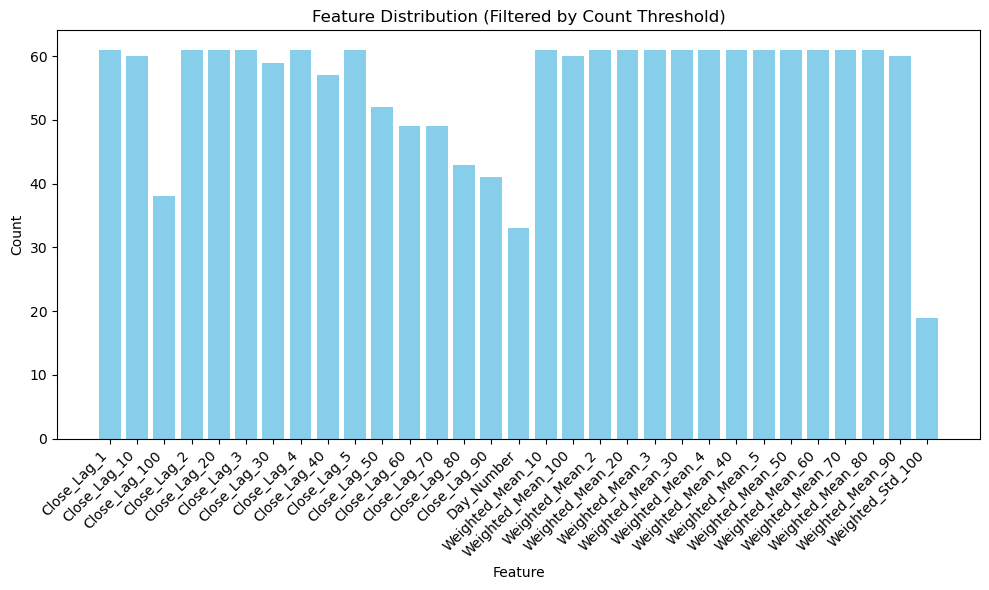

In [75]:
unique_features, counts = np.unique(mi_results_df['Feature'], return_counts=True)

# Combine the unique features and their counts into a DataFrame
feature_distribution = pd.DataFrame({'Feature': unique_features, 'Count': counts})

threshold = n/2  # Change this to whatever threshold you want

# Filter features that meet the threshold condition
filtered_distribution = feature_distribution[feature_distribution['Count'] > threshold]

# Plot the distribution using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(filtered_distribution['Feature'], filtered_distribution['Count'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.title('Feature Distribution (Filtered by Count Threshold)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [76]:
print(df. columns)

Index(['Dividends', 'Stock Splits', 'Ticker', 'Industry_Tag', 'Country',
       'Close', 'Year', 'Month', 'Day', 'DayOfWeek', 'Day_Number',
       'Close_Lag_1', 'Volume_Lag_1', 'Days_Since_Lag_1', 'Close_Lag_2',
       'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5', 'Close_Lag_10',
       'Close_Lag_20', 'Close_Lag_30', 'Close_Lag_40', 'Close_Lag_50',
       'Close_Lag_60', 'Close_Lag_70', 'Close_Lag_80', 'Close_Lag_90',
       'Close_Lag_100', 'Weighted_Mean_2', 'Weighted_Std_2', 'Weighted_Mean_3',
       'Weighted_Std_3', 'Weighted_Mean_4', 'Weighted_Std_4',
       'Weighted_Mean_5', 'Weighted_Std_5', 'Weighted_Mean_10',
       'Weighted_Std_10', 'Weighted_Mean_20', 'Weighted_Std_20',
       'Weighted_Mean_30', 'Weighted_Std_30', 'Weighted_Mean_40',
       'Weighted_Std_40', 'Weighted_Mean_50', 'Weighted_Std_50',
       'Weighted_Mean_60', 'Weighted_Std_60', 'Weighted_Mean_70',
       'Weighted_Std_70', 'Weighted_Mean_80', 'Weighted_Std_80',
       'Weighted_Mean_90', 'Weighted_Std_90'

In [83]:
df_final = df_all[['Dividends', 'Stock Splits', 'Ticker', 'Industry_Tag', 'Country',
       'Close', 'Year', 'Month', 'Day', 'DayOfWeek', 'Day_Number',
       'Close_Lag_1', 'Volume_Lag_1', 'Days_Since_Lag_1', 'Close_Lag_2',
       'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5', 
       'Close_Lag_20', 'Close_Lag_50',
       'Close_Lag_80',
       'Close_Lag_100', 'Weighted_Mean_2', 'Weighted_Std_2', 'Weighted_Mean_3',
       'Weighted_Std_3', 'Weighted_Mean_4', 'Weighted_Std_4',
       'Weighted_Mean_5', 'Weighted_Std_5', 
       'Weighted_Mean_20', 'Weighted_Std_20',
       'Weighted_Mean_50', 'Weighted_Std_50',
       'Weighted_Mean_80', 'Weighted_Std_80',
       'Weighted_Mean_100',
       'Weighted_Std_100', 'return_since_last_entry', 'diff_since_last_entry',
       'Dividends_signal', 'Stock Splits_signal']]

In [ ]:

df_final.to_csv('pr13_final_selected.csv', index=False)

NameError: name 'df_final' is not defined

In [3]:
import pandas as pd
import numpy as np
df_new = pd.read_csv('pr13_final_selected.csv')

In [7]:
df_CL=df_new[df_new['Ticker']=='CL']

In [11]:
pd.set_option('display.max_rows', None)
df_CL[['Day_Number','Close','Weighted_Mean_2']]

,Day_Number,Close,Weighted_Mean_2
15587,0,18.733959,NaN
15588,1,18.244921,NaN
15589,8,19.241810,18.473139
15590,10,19.505140,19.060557
15591,16,18.508255,19.392284
15592,17,18.639912,18.632866
15593,21,18.310913,18.581398
15594,24,18.197769,18.409613
15595,29,17.990334,18.241286
15596,31,18.103483,18.036430
